<a href="https://colab.research.google.com/github/DhiaDerbeli/Predictive-Maintenance-Safran/blob/main/Maintenace_Pr%C3%A9dictive_Safran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#impoot files
machines = pd.read_csv('./drive/MyDrive/Data/machines.csv')
errors = pd.read_csv('./drive/MyDrive/Data/errors.csv')
failures = pd.read_csv('./drive/MyDrive/Data/failures.csv')
data = pd.read_csv('./drive/MyDrive/Data/data.csv')
maintenances = pd.read_csv('./drive/MyDrive/Data/maintenances.csv')

In [ ]:
one_hot = pd.get_dummies(failures['failure'])
failures = failures.join(one_hot)

In [ ]:
one_hot = pd.get_dummies(errors['errorID'])
errors = errors.join(one_hot)

In [ ]:
maintenances.loc[maintenances.comp == "comp1", "comp"] = "maintComp1"
maintenances.loc[maintenances.comp == "comp2", "comp"] = "maintComp2"
maintenances.loc[maintenances.comp == "comp3", "comp"] = "maintComp3"
maintenances.loc[maintenances.comp == "comp4", "comp"] = "maintComp4"
one_hot = pd.get_dummies(maintenances['comp'])
maintenances = maintenances.join(one_hot)

In [ ]:
errors = errors.drop('errorID',axis=1)
failures = failures.drop('failure',axis=1)
maintenances = maintenances.drop('comp',axis=1)

In [ ]:
errors = errors.groupby(['machineID','datetime']).max()
failures = failures.groupby(['machineID','datetime']).max()
maintenances = maintenances.groupby(['machineID','datetime']).max()

In [ ]:
errors = errors.reset_index()
failures = failures.reset_index()
maintenances = maintenances.reset_index()

In [ ]:
failures['datetime'] = failures['datetime'].apply(pd.to_datetime)
errors['datetime'] = errors['datetime'].apply(pd.to_datetime)
data['datetime'] = data['datetime'].apply(pd.to_datetime)
maintenances['datetime'] = maintenances['datetime'].apply(pd.to_datetime)

In [ ]:

machines = machines.drop('model',axis=1)
test = pd.merge(data,machines,on=['machineID'])
test = pd.merge(test,errors,how = 'left' , on=['datetime','machineID'])
test['error1'] = test['error1'].fillna(0)
test['error2'] = test['error2'].fillna(0)
test['error3'] = test['error3'].fillna(0)
test['error4'] = test['error4'].fillna(0)
test['error5'] = test['error5'].fillna(0)
test = pd.merge(test,failures,how = 'left' , on=['datetime','machineID'])
test['comp1'] = test['comp1'].fillna(0)
test['comp2'] = test['comp2'].fillna(0)
test['comp3'] = test['comp3'].fillna(0)
test['comp4'] = test['comp4'].fillna(0)
maintenances = maintenances[maintenances['datetime'] >= '2015']
test = pd.merge(test,maintenances,how = 'left' , on=['datetime','machineID'])
test['maintComp1'] = test['maintComp1'].fillna(0)
test['maintComp2'] = test['maintComp2'].fillna(0)
test['maintComp3'] = test['maintComp3'].fillna(0)
test['maintComp4'] = test['maintComp4'].fillna(0)

In [ ]:
test

,datetime,machineID,volt,rotate,pressure,vibration,age,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,maintComp1,maintComp2,maintComp3,maintComp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = test

In [ ]:
df['comp1_fails_in_aday'] = df['comp1'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,12]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp1_fails_in_aday'] = 1
df['comp2_fails_in_aday'] = df['comp2'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,13]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp2_fails_in_aday'] = 1
df['comp3_fails_in_aday'] = df['comp3'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,14]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp3_fails_in_aday'] = 1
df['comp4_fails_in_aday'] = df['comp4'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,15]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp4_fails_in_aday'] = 1
       

In [ ]:
features_col_name=['volt' , 'rotate' , 'pressure' , 'vibration' ,	'age'  , 'error1', 'error2' , 'error3' , 'error4' , 'maintComp1', 'maintComp2','maintComp3' , 'maintComp4']
target_col_day=['comp1_fails_in_aday','comp2_fails_in_aday','comp3_fails_in_aday','comp4_fails_in_aday']

In [ ]:
train = pd.DataFrame(columns = df.columns)
test = pd.DataFrame(columns = df.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in range(1,101):
  k = df[df['machineID'] == i][:6503]
  train = train.append(k)
  k = df[df['machineID'] == i][6503:]
  test = test.append(k)

sc=MinMaxScaler()
train[features_col_name]=sc.fit_transform(train[features_col_name])
test[features_col_name]=sc.transform(test[features_col_name])

In [ ]:
seq_cols=features_col_name
def gen_sequence(id_df, seq_length, seq_cols):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)

# function to generate labels
def gen_label(id_df, seq_length, seq_cols,labels):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        y_label.append([id_df[labels[0]][stop],id_df[labels[1]][stop],id_df[labels[2]][stop],id_df[labels[3]][stop]])
    return np.array(y_label)

In [ ]:
# generate X_train
X_train=np.concatenate(list(list(gen_sequence(train[train['machineID']==id], day, seq_cols)) for id in train['machineID'].unique()))
print(X_train.shape)
# generate y_train
y_train=np.concatenate(list(list(gen_label(train[train['machineID']==id], day, seq_cols,target_col_day)) for id in train['machineID'].unique()))
print(y_train.shape)
# generate X_test
X_test=np.concatenate(list(list(gen_sequence(test[test['machineID']==id], day, seq_cols)) for id in test['machineID'].unique()))
print(X_test.shape)
# generate y_test
y_test=np.concatenate(list(list(gen_label(test[test['machineID']==id], day, seq_cols,target_col_day)) for id in test['machineID'].unique()))
print(y_test.shape)
y_train = list(np.transpose(y_train))
y_test = list(np.transpose(y_test))

(650200, 24, 13)
(650200, 4)
(225700, 24, 13)
(225700, 4)


In [ ]:
from keras.models import Model
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
class UtkMultiOutputModel():
    def make_default_hidden_layers(self, inputs):
        x = LSTM(units=200,return_sequences=True)(inputs)
        x = Dropout(0.2)(x)
        x = LSTM(units=200,return_sequences=False)(inputs)
        x = Dropout(0.2)(x)
        return x
    def build_comp1_branch(self, inputs):
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp1")(x)
        return x
    def build_comp2_branch(self, inputs):
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp2")(x)
        return x
    def build_comp3_branch(self, inputs):   
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp3")(x)
        return x

    def build_comp4_branch(self, inputs):   
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp4")(x)
        return x
    def assemble_full_model(self, timestamp, nb_features):
        input_shape=(timestamp, nb_features)
        inputs = Input(shape=input_shape)
        branch1 = self.build_comp1_branch(inputs)
        branch2 = self.build_comp2_branch(inputs)
        branch3 = self.build_comp3_branch(inputs)
        branch4 = self.build_comp4_branch(inputs)
        model = Model(inputs=inputs,
                     outputs = [branch1,branch2,branch3,branch4],
                     name="failure")
        return model
nb_features =X_train.shape[2]
timestamp=day

    
model = UtkMultiOutputModel().assemble_full_model(timestamp,nb_features)


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(optimizer='adam', 
              loss={
                  'comp1': 'binary_crossentropy',
                  'comp2': 'binary_crossentropy',
                  'comp3': 'binary_crossentropy', 
                  'comp4': 'binary_crossentropy'},
              loss_weights={
                  'comp1': 0.1,
                  'comp2': 0.1,
                  'comp3': 0.1, 
                  'comp4': 0.1},
              metrics={
                  'comp1': 'accuracy',
                  'comp2': 'accuracy',
                  'comp3': 'accuracy',
                  'comp4': 'accuracy'},)

model.fit(X_train, y_train, epochs=3, batch_size=100, validation_split=0.2)

Epoch 1/3
5202/5202 [==============================] - 108s 20ms/step - loss: 0.0092 - comp1_loss: 0.0340 - comp2_loss: 0.0154 - comp3_loss: 0.0209 - comp4_loss: 0.0216 - comp1_accuracy: 0.9944 - comp2_accuracy: 0.9973 - comp3_accuracy: 0.9967 - comp4_accuracy: 0.9948 - val_loss: 0.0080 - val_comp1_loss: 0.0353 - val_comp2_loss: 1.0330e-04 - val_comp3_loss: 0.0308 - val_comp4_loss: 0.0133 - val_comp1_accuracy: 0.9936 - val_comp2_accuracy: 1.0000 - val_comp3_accuracy: 0.9937 - val_comp4_accuracy: 0.9949
Epoch 2/3
5202/5202 [==============================] - 98s 19ms/step - loss: 0.0031 - comp1_loss: 0.0131 - comp2_loss: 0.0015 - comp3_loss: 0.0043 - comp4_loss: 0.0116 - comp1_accuracy: 0.9967 - comp2_accuracy: 0.9998 - comp3_accuracy: 0.9986 - comp4_accuracy: 0.9949 - val_loss: 0.0036 - val_comp1_loss: 0.0083 - val_comp2_loss: 0.0104 - val_comp3_loss: 0.0030 - val_comp4_loss: 0.0146 - val_comp1_accuracy: 0.9965 - val_comp2_accuracy: 0.9965 - val_comp3_accuracy: 0.9989 - val_comp4_accura

In [ ]:
model.summary()

Model: "failure"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 13)]     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 50)           12800       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 50)           12800       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 50)           12800       input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
y_pred = np.array(model.predict(X_test))

In [ ]:
y_pred_comp1 = y_pred[0].flatten()
y_pred_comp2 = y_pred[1].flatten()
y_pred_comp3 = y_pred[2].flatten()
y_pred_comp4 = y_pred[3].flatten()

In [ ]:
y_true_comp1 = y_test[0].flatten()
y_true_comp2 = y_test[1].flatten()
y_true_comp3 = y_test[2].flatten()
y_true_comp4 = y_test[3].flatten()

In [ ]:
y_pred_classes_comp1= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp1)))
y_pred_classes_comp2= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp2)))
y_pred_classes_comp3= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp3)))
y_pred_classes_comp4= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp4)))

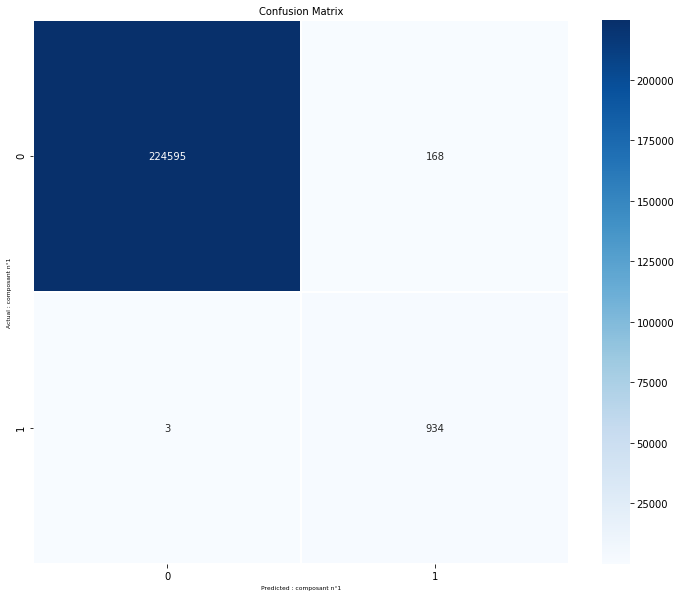

Accuracy :  0.9992423571112096
Recall :  0.9967982924226254
Precision :  0.8475499092558983
F1 score :  0.916135360470819


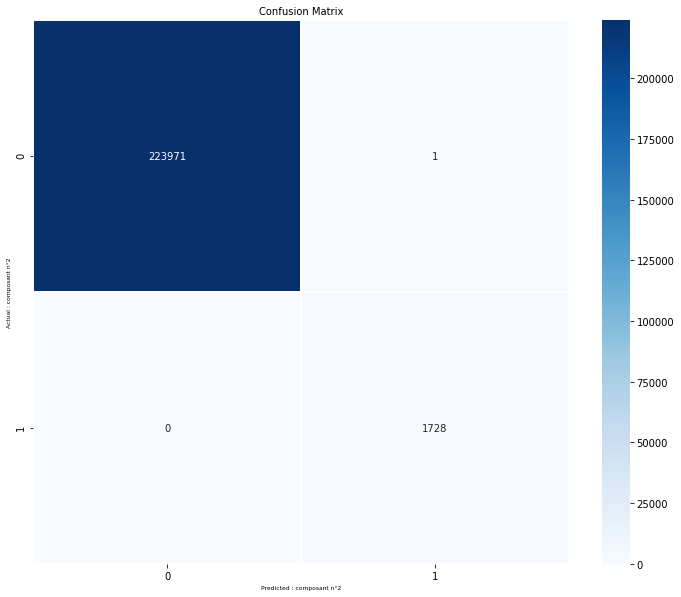

Accuracy :  0.9999955693398316
Recall :  1.0
Precision :  0.9994216310005783
F1 score :  0.9997107318484235


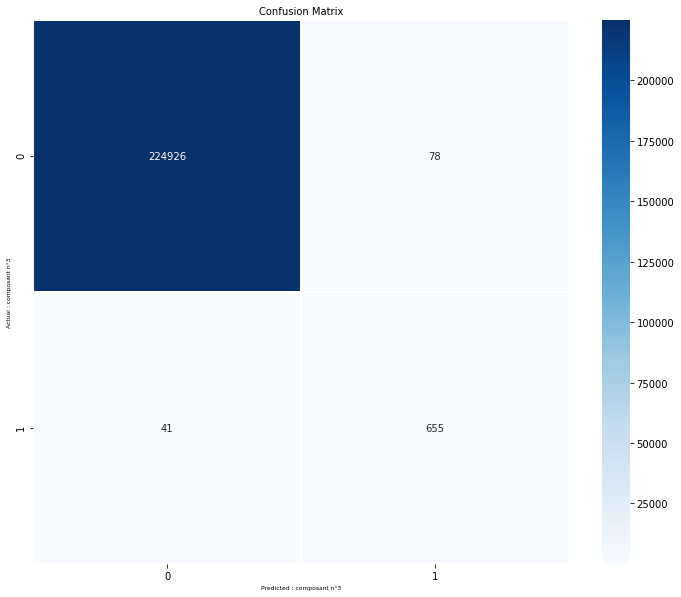

Accuracy :  0.9994727514399645
Recall :  0.9410919540229885
Precision :  0.8935879945429741
F1 score :  0.9167249825052485


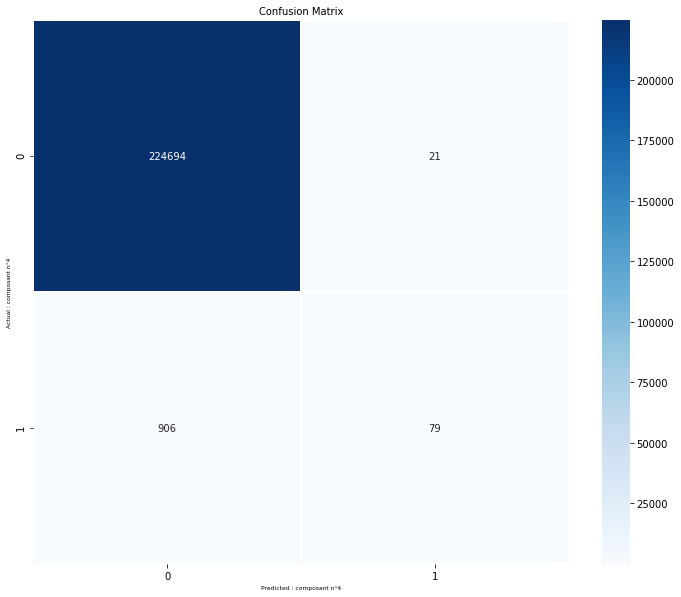

Accuracy :  0.9958927780239256
Recall :  0.08020304568527918
Precision :  0.79
F1 score :  0.1456221198156682


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#plotting the cm
import seaborn as sns
import matplotlib.pyplot as plt
def conf_mat(y_true , y_pred_classes , name):
  cm = confusion_matrix(y_true,y_pred_classes)
  plt.figure(figsize = (12, 10))
  cm = pd.DataFrame(cm , index = [0,1] , columns = [0,1])
  sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
  plt.title('Confusion Matrix', size=10)
  plt.xlabel('Predicted : '+name , size=6)
  plt.ylabel('Actual : '+name ,size=6)
  plt.show()
  return cm
def performance(cm):
  #Accuracy
  print('Accuracy : ', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[0][1]+cm[1][1]))
  #Recall
  recall = (cm[1][1]/(cm[1][1]+cm[0][1]))
  print('Recall : ', recall )
  #Precision
  precision = (cm[1][1]/(cm[1][1]+cm[1][0]))
  print('Precision : ', precision )
  #F1 Score
  print('F1 score : ',2*precision*recall/(precision+recall))
performance(conf_mat(y_true_comp1 , y_pred_classes_comp1 , 'composant n°1'))
performance(conf_mat(y_true_comp2 , y_pred_classes_comp2 , 'composant n°2'))
performance(conf_mat(y_true_comp3 , y_pred_classes_comp3 , 'composant n°3'))
performance(conf_mat(y_true_comp4 , y_pred_classes_comp4 , 'composant n°4'))

In [ ]:
def prob_failure(machine_id , comp):
    machine_df=test[test.machineID==machine_id]
    machine_test=gen_sequence(machine_df,day,seq_cols)
    m_pred=model.predict(machine_test)
    failure_prob=list(m_pred[comp][-1]*100)[0]
    print('the probability of failure of comp number ' , comp+1 ,'corresponding to machine number ' ,machine_id ,' is : ' , failure_prob)

In [ ]:
prob_failure(80,0)

the probability of failure of comp number  0 corresponding to machine number  80  is :  0.27662206


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!mv model.json /content/drive/MyDrive/Data/

In [ ]:
!mv model.h5 /content/drive/MyDrive/Data/

In [ ]:
from keras.models import model_from_json
# later...
 
# load json and create model
json_file = open('/content/drive/MyDrive/Data/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Data/model.h5")
print("Loaded model from disk")